<a href="https://colab.research.google.com/github/anastaszi/255-DM-TeamProject/blob/workBy_shreya/CMPE255_Project_MAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 - Project
**California House Price Prediction**

* Business Understanding - House prices are always changing and it is humanly impossible to determine what the price might be tomorrow. So with help of historical data and using machine learning algorithms help people to make offers based on the predicted prices that will increase the probability of buying.

* Data Understanding
* Data Preparation 
* Modeling 
* Evaluation 
* Deployment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Library

In [2]:
!pip install plotly
!pip install uszipcode
!pip install shap

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

import sklearn
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from yellowbrick.features.pca import (PCADecomposition)

from sklearn.cluster import KMeans

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, classification_report

# Regression
import time
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# for web scraping weather information
import requests
from bs4 import BeautifulSoup

import csv

try:
  from urllib.request import urlopen
except ImportError:
  from urllib2 import urlopen

# for web scraping zip codes

from uszipcode import SearchEngine

# for webscraping altitudes
import json
import urllib
import urllib3

# Density plot
from scipy.stats import gaussian_kde

# for SHAP values

import shap

# warnings
import warnings
warnings.filterwarnings('ignore')

#visuallizer
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

import matplotlib.image as mpimg
import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from pandas.plotting import scatter_matrix
from scipy.special import boxcox, inv_boxcox

from scipy.stats import linregress

import pickle

from sklearn.metrics import silhouette_score
import re

from yellowbrick.features import FeatureImportances


import plotly.express as px


In [5]:
# setting maximum column width and display max columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Data Collection and Understanding 

Dataset: TBD

In [6]:
df = pd.read_csv('/content/drive/MyDrive/CMPE255 - Data Mining/CMPE255-DM-Project/Dataset/Dataset_Realestate.csv')

In [7]:
df.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,205,70983496,"109 Sunrise Fls, Cibolo, TX 78108",29.599431,-98.254866,296000.0,USD,3.0,3.0,2294.0 sqft,NaN,270100.0,2024.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/41ca49058594aa920764c275348a1a5b-p_e.jpg,House for sale,Opendoor Brokerage LLC,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/109-Sunrise-Fls-Cibolo-TX-78108/70983496_zpid/,https://www.zillow.com/homes/TX_rb/6_p/
1,711,30429260,"299 Mount Whitney Way, Lake Placid, NY 12946",44.306944,-73.950285,1995000.0,USD,5.0,4.0,3000.0 sqft,NaN,NaN,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/3071787e4e53ff37262f4f8a7e28b740-p_e.jpg,House for sale,"Listing by: Merrill L. Thomas, Inc.",https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/299-Mount-Whitney-Way-Lake-Placid-NY-12946/30429260_zpid/,https://www.zillow.com/homes/NY_rb/18_p/
2,66,97629907,"2910 Persimmon Grv, Richmond, TX 77469",29.557442,-95.751786,425000.0,USD,3.0,2.0,2575.0 sqft,NaN,436000.0,2967.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/f4716b346d1f1ed2de4aa9feffaca33a-p_e.jpg,House for sale,CENTURY 21 Western Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/2910-Persimmon-Grv-Richmond-TX-77469/97629907_zpid/,https://www.zillow.com/homes/TX_rb/2_p/
3,222,240296342,"19251 E State Route 106, Belfair, WA 98528",47.427678,-122.855113,895000.0,USD,2.0,2.0,1248.0 sqft,NaN,NaN,1969.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/690e2ee9c080ca2569a879c42777d3ee-p_e.jpg,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/19251-E-State-Route-106-Belfair-WA-98528/240296342_zpid/,https://www.zillow.com/homes/WA_rb/6_p/
4,444,2076995275,"Clover Plan, The Alpine Collection at Altaira at High Point",39.813670,-104.765885,391500.0,USD,3.0,4.0,1752.0 sqft,NaN,NaN,1756.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/9b2ae0d3768684967fdcd6cfd81b1039-p_e.jpg,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/alpine-collection-at-altaira-at-high-point/2076995275_zpid/,"https://www.zillow.com/homes/denver,-co_rb/12_p/"


Extracting data only for California

In [8]:
df_cali=df[(df.address.str.contains('[.\s]*ca\s\d{5}$', flags=re.IGNORECASE|re.DOTALL)==True)]
df_cali

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
8,24,16713230,"545 Ocean View Ave, Encinitas, CA 92024",33.058939,-117.291904,2799900.0,USD,4.0,4.0,3164.0 sqft,NaN,2951100.0,8486.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/5df598bdc169d389a30c47ba1e67ec64-p_e.jpg,House for sale,"eXp Realty of California, Inc.","https://www.zillow.com/homes/Encinitas,-CA_rb/",https://www.zillow.com/homedetails/545-Ocean-View-Ave-Encinitas-CA-92024/16713230_zpid/,"https://www.zillow.com/homes/Encinitas,-CA_rb/"
9,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.708987,-117.154838,674900.0,USD,2.0,2.0,1078.0 sqft,NaN,NaN,NaN,25.0,NaN,False,https://photos.zillowstatic.com/fp/057244ef1708e132ddbb5f5cff22839c-p_e.jpg,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Ave-UNIT-224-San-Diego-CA-92101/72109285_zpid/,"https://www.zillow.com/homes/San-Diego,-CA_rb/19_p/"
12,105,16649104,"1735 Kirk Pl, Carlsbad, CA 92008",33.154925,-117.323344,1695000.0,USD,2.0,4.0,2132.0 sqft,NaN,1714700.0,3200.0,63.0,NaN,False,https://photos.zillowstatic.com/fp/08c1e6f153b9eb1acd7b1317a6ab3afa-p_e.jpg,House for sale,Pacific Investment Properties,"https://www.zillow.com/homes/carlsbad,-CA_rb/",https://www.zillow.com/homedetails/1735-Kirk-Pl-Carlsbad-CA-92008/16649104_zpid/,"https://www.zillow.com/homes/carlsbad,-CA_rb/3_p/"
15,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.720323,-117.170483,779000.0,USD,3.0,2.0,1282.0 sqft,NaN,774700.0,3566.0,29.0,NaN,False,https://photos.zillowstatic.com/fp/b65f7892a398c20b91ec507f5bf4d050-p_e.jpg,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech-St-UNIT-301-San-Diego-CA-92101/88783088_zpid/,"https://www.zillow.com/homes/San-Diego,-CA_rb/20_p/"
17,423,2068655346,"96 Quail Hollow Dr, San Jose, CA 95128",37.298259,-121.934681,269000.0,USD,2.0,2.0,1440.0 sqft,NaN,NaN,2914.0,38.0,NaN,False,https://photos.zillowstatic.com/fp/c46224421320696ee1acb773343d25d5-p_e.jpg,Home for sale,NaN,"https://www.zillow.com/homes/san-jose,-CA_rb/",https://www.zillow.com/homedetails/96-Quail-Hollow-Dr-San-Jose-CA-95128/2068655346_zpid/,"https://www.zillow.com/homes/san-jose,-CA_rb/11_p/"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,142,61239165,"3663 Purer Rd, Escondido, CA 92029",33.070442,-117.101298,2859000.0,USD,5.0,4.0,5947.0 sqft,NaN,2860400.0,9577.0,43.0,NaN,False,https://photos.zillowstatic.com/fp/3ee2c45603a03bbb0c709c826f95ae99-p_e.jpg,House for sale,Berkshire Hathaway HomeService,"https://www.zillow.com/homes/Escondido,-CA_rb/",https://www.zillow.com/homedetails/3663-Purer-Rd-Escondido-CA-92029/61239165_zpid/,"https://www.zillow.com/homes/Escondido,-CA_rb/4_p/"
5880,637,16872431,"4769 Seda Dr, San Diego, CA 92124",32.826653,-117.076360,835000.0,USD,3.0,3.0,1906.0 sqft,NaN,859500.0,3556.0,20.0,NaN,False,https://photos.zillowstatic.com/fp/7ef2dd8eba6b869454f60fb5b1a4bcf9-p_e.jpg,Townhouse for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4769-Seda-Dr-San-Diego-CA-92124/16872431_zpid/,"https://www.zillow.com/homes/San-Diego,-CA_rb/16_p/"
5881,479,2068836301,"3300 Narvaez Ave SPACE 140, San Jose, CA 95136",37.276635,-121.863132,235000.0,USD,2.0,2.0,1100.0 sqft,NaN,248000.0,2882.0,56.0,NaN,False,https://photos.zillowstatic.com/fp/e36daf180aad6ea942304ba96b4fe98c-p_e.jpg,Home for sale,NaN,"https://www.zillow.com/homes/san-jose,-CA_rb/",https://www.zillow.com/homedetails/3300-Narvaez-Ave-SPACE-140-San-Jose-CA-95136/2068836301_zpid/,"https://www.zillow.com/homes/san-jose,-CA_rb/12_p/"
5888,146,61322711,"2043 Sonador Cmns, San Jose, CA 95128",37.301273,-121.929018,850000.0,USD,3.0,2.0,1860.0 sqft,NaN,858569.0,3668.0,3.0,NaN,False,h

In [9]:
df_cali.reset_index(level=0, inplace=True)

In [10]:
df_cali.shape

(1824, 23)

In [ ]:
df_cali.dtypes

rank                 int64
property_id          int64
address             object
latitude           float64
longitude          float64
price              float64
currency            object
bathrooms          float64
bedrooms           float64
area                object
land_area           object
zestimate          float64
rent_zestimate     float64
days_on_zillow     float64
sold_date          float64
is_zillow_owned       bool
image               object
listing_type        object
broker_name         object
input               object
property_url        object
listing_url         object
dtype: object

In [ ]:
df_cali.info

<bound method DataFrame.info of       rank  property_id                                         address  \
8       24     16713230         545 Ocean View Ave, Encinitas, CA 92024   
9      728     72109285      350 11th Ave UNIT 224, San Diego, CA 92101   
12     105     16649104                1735 Kirk Pl, Carlsbad, CA 92008   
15     778     88783088    825 W Beech St UNIT 301, San Diego, CA 92101   
17     423   2068655346          96 Quail Hollow Dr, San Jose, CA 95128   
...    ...          ...                                             ...   
5879   142     61239165              3663 Purer Rd, Escondido, CA 92029   
5880   637     16872431               4769 Seda Dr, San Diego, CA 92124   
5881   479   2068836301  3300 Narvaez Ave SPACE 140, San Jose, CA 95136   
5888   146     61322711           2043 Sonador Cmns, San Jose, CA 95128   
5889   105     16940676          1333 Nashville St, San Diego, CA 92110   

       latitude   longitude      price currency  bathrooms  bedroom

In [11]:
pd.options.display.float_format = '{:.5f}'.format

In [12]:
df_cali.describe()

,index,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,sold_date
count,1824.00000,1824.00000,1824.00000,1816.00000,1816.00000,1824.00000,1639.00000,1655.00000,1480.00000,1673.00000,1821.00000,0.00000
mean,2954.95066,286.05373,388115376.33443,34.31472,-118.66203,1416081.65844,2.56132,3.17221,1384120.90405,4457.21040,35.56507,nan
std,1726.36014,222.17396,760894850.74492,2.05553,2.19840,2397302.15376,1.25249,2.68971,1732894.17161,4779.62525,142.15179,nan
min,8.00000,1.00000,16586513.00000,32.54861,-122.03035,39950.00000,1.00000,0.00000,82760.00000,1084.00000,-17.00000,nan
25%,1469.50000,89.00000,16947363.50000,32.79825,-121.83102,599000.00000,2.00000,2.00000,646914.25000,2749.00000,3.00000,nan
50%,2947.00000,229.00000,19717230.00000,33.07933,-117.23564,898000.00000,2.00000,3.00000,927349.00000,3416.00000,13.00000,nan
75%,4476.25000,463.00000,99595719.75000,37.26307,-117.11007,1450000.00000,3.00000,4.00000,1466494.25000,4227.00000,30.00000,nan
max,5889.00000,800.00000,2146138421.00000,37.42692,-116.99512,49000000.00000,16.00000,99.00000,22336400.00000,84823.00000,5171.00000,nan


Data Understanding - As we can see from the data here it has 1824 rows and 22 columns

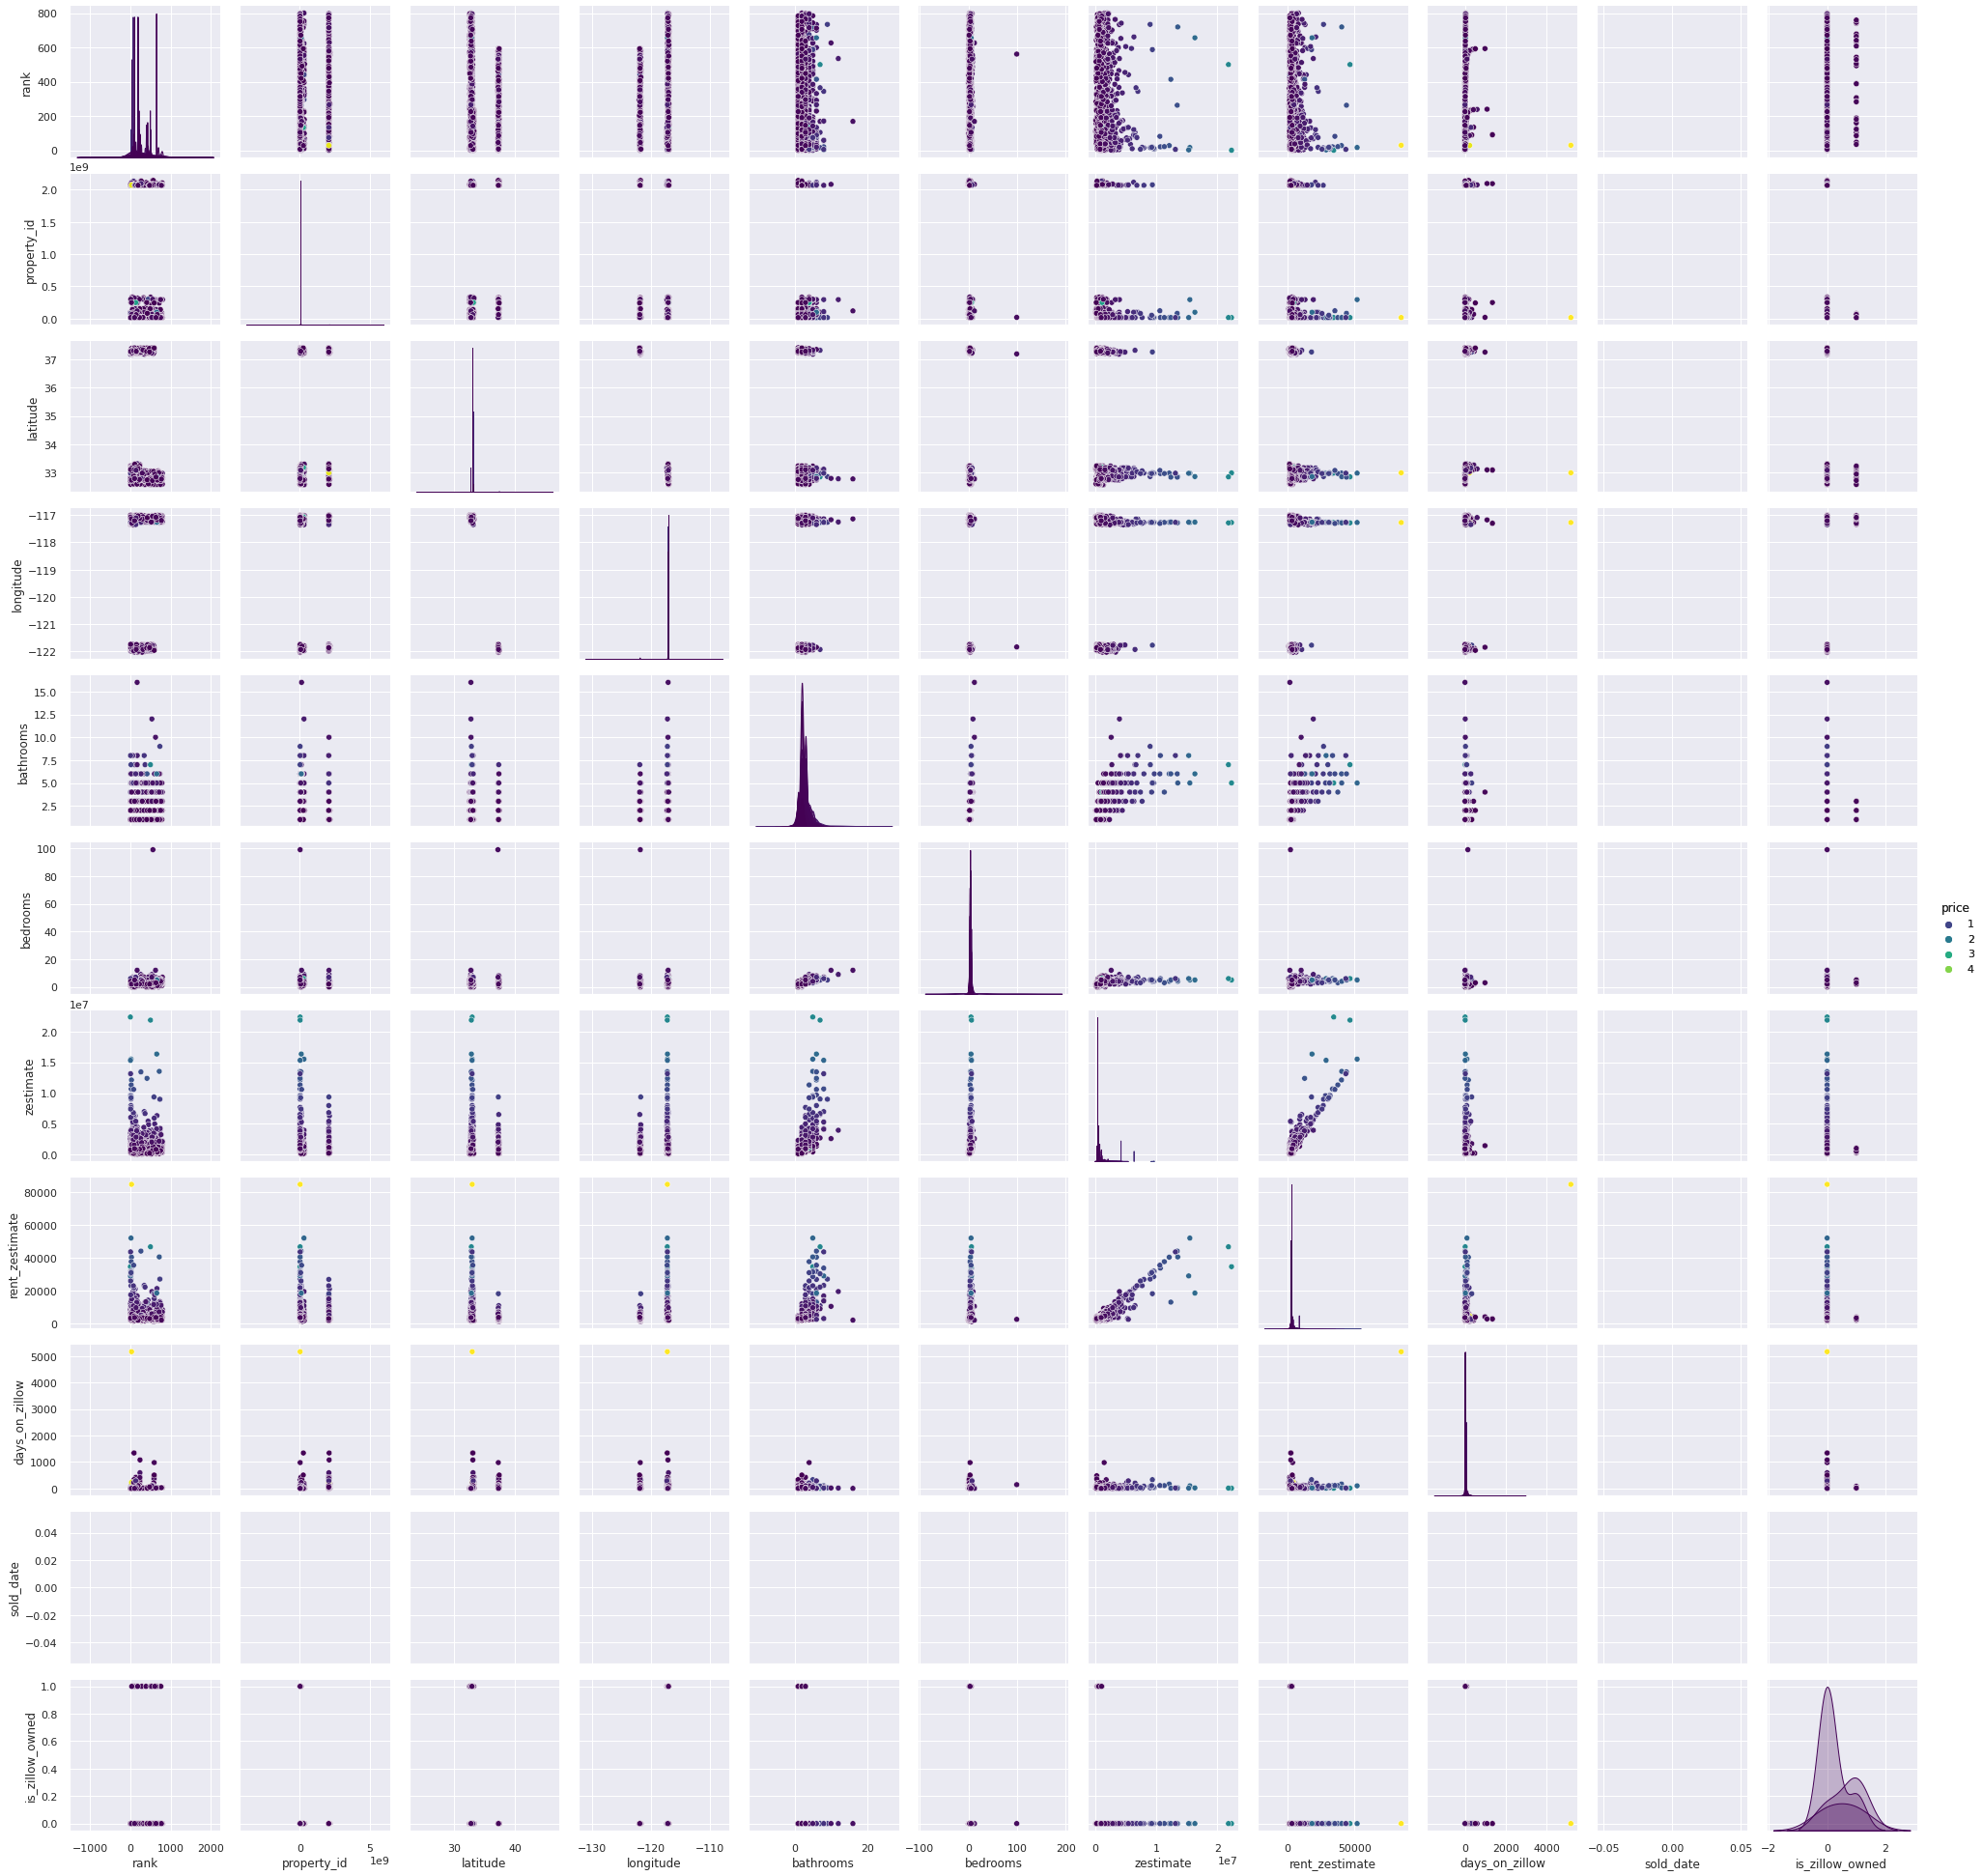

In [ ]:
sns.pairplot(df_cali, hue='price', palette='viridis').add_legend()
plt.show()

The above pairplot provides how price is associated with the other features like bedroom, bathroom. zestimate etc.

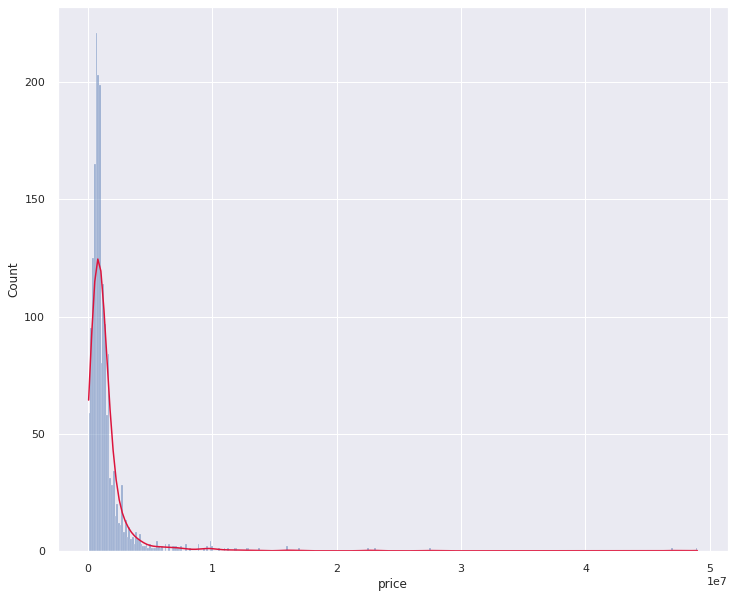

In [ ]:
plt.figure(figsize=(12,10))
ax = sns.histplot(data=df_cali, x='price', color='b', kde=True)
ax.lines[0].set_color('crimson')
plt.show()

The above plot provides skewness of the price

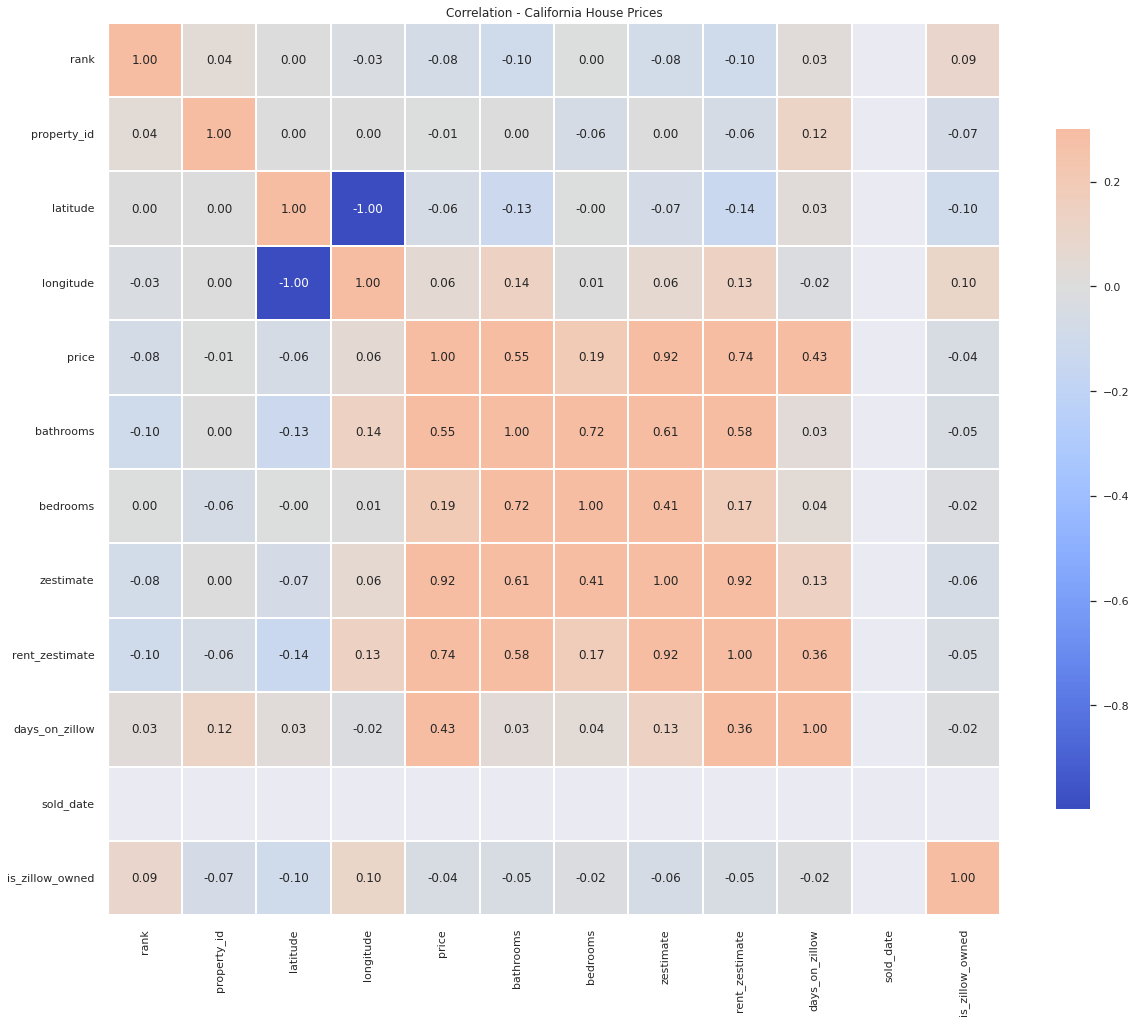

In [ ]:
corr = df_cali.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,25)
plt.title('Correlation - California House Prices')
plt.show()

The above heatmap provides correlation between all the columns present in the dataset.

In [ ]:
df_cali['listing_type'].unique()

array(['House for sale', 'Condo for sale', 'Home for sale',
       'Multi-family home for sale', 'Coming soon', 'Lot / Land for sale',
       'New construction', 'Townhouse for sale', 'Foreclosure'],
      dtype=object)

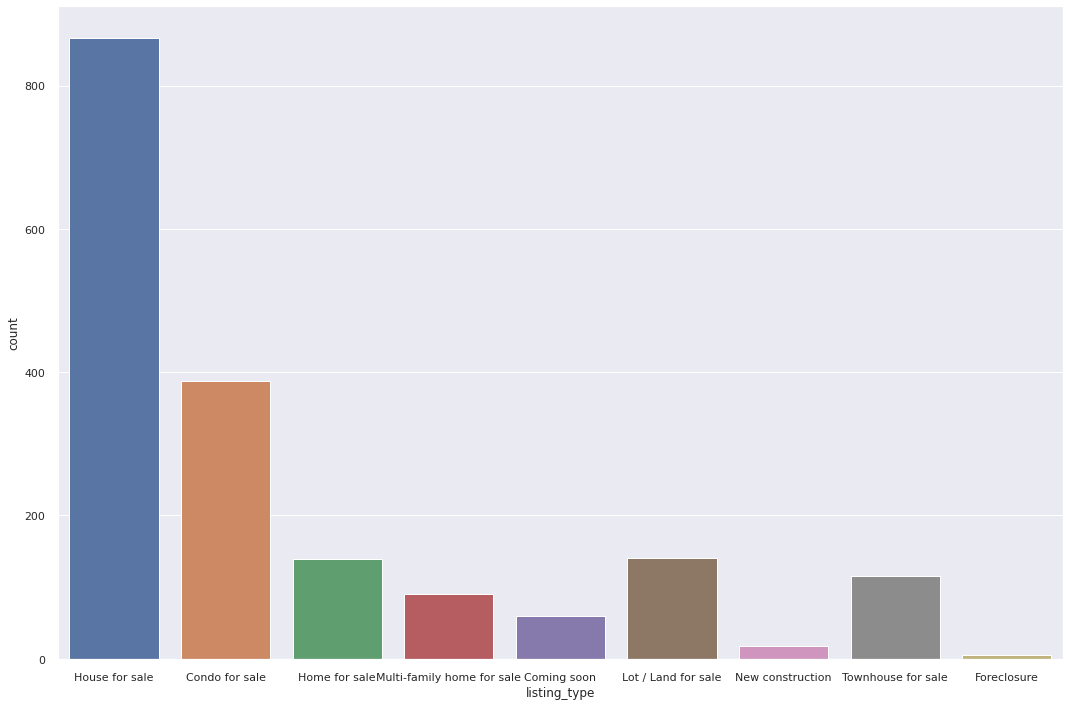

In [ ]:
plt.figure(figsize=(18,12))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="listing_type", data=df_cali)

In [ ]:
listing_type = df_cali.groupby(["listing_type"])
sum_listing_type = listing_type["price"].mean()
rent_listing_type=listing_type["rent_zestimate"].mean()
print (sum_listing_type, rent_listing_type)

listing_type
Coming soon                  1093159.95000
Condo for sale                751726.29124
Foreclosure                  1851600.00000
Home for sale                 252138.34532
House for sale               1805057.85928
Lot / Land for sale          1905853.74286
Multi-family home for sale   2020287.35165
New construction             3390059.50000
Townhouse for sale            894302.68696
Name: price, dtype: float64 listing_type
Coming soon                   4263.08000
Condo for sale                3085.99424
Foreclosure                   4009.00000
Home for sale                 2916.48305
House for sale                5515.13117
Lot / Land for sale           3113.42975
Multi-family home for sale    4050.03797
New construction             11337.50000
Townhouse for sale            3422.83178
Name: rent_zestimate, dtype: float64


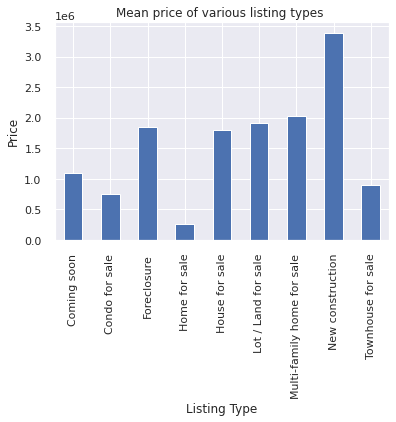

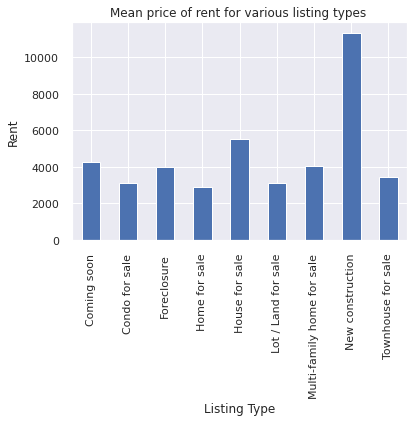

In [ ]:
sum_listing_type.plot(kind="bar")
plt.title("Mean price of various listing types ")
plt.ylabel("Price")
plt.xlabel("Listing Type")
plt.show()
rent_listing_type.plot(kind="bar")
plt.title("Mean price of rent for various listing types ")
plt.ylabel("Rent")
plt.xlabel("Listing Type")
plt.show()

In [ ]:
fig = px.histogram(df_cali, x='price', y='zestimate', color='listing_type', histfunc='avg', hover_data=df_cali.columns, template='seaborn')
fig.show()

In [ ]:
df_cali.isna().sum().sort_values(ascending=False)

sold_date          1824
land_area          1683
broker_name        1305
zestimate           344
bathrooms           185
bedrooms            169
rent_zestimate      151
area                148
latitude              8
longitude             8
days_on_zillow        3
currency              0
property_id           0
address               0
price                 0
listing_url           0
property_url          0
is_zillow_owned       0
image                 0
listing_type          0
input                 0
rank                  0
dtype: int64

Summary

## Data Preparation

In [13]:
df_cali['area_sqft'] = df_cali['area'].str.replace('\ssqft', '0', regex=True)
df_cali.head()

,index,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url,area_sqft
0,8,24,16713230,"545 Ocean View Ave, Encinitas, CA 92024",33.05894,-117.29190,2799900.00000,USD,4.00000,4.00000,3164.0 sqft,NaN,2951100.00000,8486.00000,9.00000,nan,False,https://photos.zillowstatic.com/fp/5df598bdc169d389a30c47ba1e67ec64-p_e.jpg,House for sale,"eXp Realty of California, Inc.","https://www.zillow.com/homes/Encinitas,-CA_rb/",https://www.zillow.com/homedetails/545-Ocean-View-Ave-Encinitas-CA-92024/16713230_zpid/,"https://www.zillow.com/homes/Encinitas,-CA_rb/",3164.00
1,9,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.70899,-117.15484,674900.00000,USD,2.00000,2.00000,1078.0 sqft,NaN,nan,nan,25.00000,nan,False,https://photos.zillowstatic.com/fp/057244ef1708e132ddbb5f5cff22839c-p_e.jpg,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/350-11th-Ave-UNIT-224-San-Diego-CA-92101/72109285_zpid/,"https://www.zillow.com/homes/San-Diego,-CA_rb/19_p/",1078.00
2,12,105,16649104,"1735 Kirk Pl, Carlsbad, CA 92008",33.15492,-117.32334,1695000.00000,USD,2.00000,4.00000,2132.0 sqft,NaN,1714700.00000,3200.00000,63.00000,nan,False,https://photos.zillowstatic.com/fp/08c1e6f153b9eb1acd7b1317a6ab3afa-p_e.jpg,House for sale,Pacific Investment Properties,"https://www.zillow.com/homes/carlsbad,-CA_rb/",https://www.zillow.com/homedetails/1735-Kirk-Pl-Carlsbad-CA-92008/16649104_zpid/,"https://www.zillow.com/homes/carlsbad,-CA_rb/3_p/",2132.00
3,15,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.72032,-117.17048,779000.00000,USD,3.00000,2.00000,1282.0 sqft,NaN,774700.00000,3566.00000,29.00000,nan,False,https://photos.zillowstatic.com/fp/b65f7892a398c20b91ec507f5bf4d050-p_e.jpg,Condo for sale,NaN,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/825-W-Beech-St-UNIT-301-San-Diego-CA-92101/88783088_zpid/,"https://www.zillow.com/homes/San-Diego,-CA_rb/20_p/",1282.00
4,17,423,2068655346,"96 Quail Hollow Dr, San Jose, CA 95128",37.29826,-121.93468,269000.00000,USD,2.00000,2.00000,1440.0 sqft,NaN,nan,2914.00000,38.00000,nan,False,https://photos.zillowstatic.com/fp/c46224421320696ee1acb773343d25d5-p_e.jpg,Home for sale,NaN,"https://www.zillow.com/homes/san-jose,-CA_rb/",https://www.zillow.com/homedetails/96-Quail-Hollow-Dr-San-Jose-CA-95128/2068655346_zpid/,"https://www.zillow.com/homes/san-jose,-CA_rb/11_p/",1440.00


In [14]:
df_cali['area_sqft'] = df_cali['area_sqft'].astype(float)

In [ ]:
# converting string attributes to the codes
#df_cali['address'] = df_cali['address'].astype('category').cat.codes
df_cali['area'] = df_cali['area'].astype('category').cat.codes
df_cali['listing_type'] = df_cali['listing_type'].astype('category').cat.codes
df_cali['broker_name'] = df_cali['broker_name'].astype('category').cat.codes
df_cali['input'] = df_cali['input'].astype('category').cat.codes
df_cali['image'] = df_cali['image'].astype('category').cat.codes
df_cali['listing_url'] = df_cali['listing_url'].astype('category').cat.codes

In [46]:
columns = ['area','image', 'listing_type', 'broker_name', 'input', 'listing_url'] # 'address'
df_feat = df_cali.copy()
df_feat[columns] = df_feat[columns].apply(lambda x: x.astype('category').cat.codes)
df_feat.dtypes

index                int64
rank                 int64
property_id          int64
address             object
latitude           float64
longitude          float64
price              float64
currency            object
bathrooms          float64
bedrooms           float64
area                 int16
land_area           object
zestimate          float64
rent_zestimate     float64
days_on_zillow     float64
sold_date          float64
is_zillow_owned       bool
image                int16
listing_type          int8
broker_name          int16
input                 int8
property_url        object
listing_url           int8
area_sqft          float64
dtype: object

In [32]:
df_feat.isna().sum().sort_values(ascending=False)

sold_date          1824
land_area          1683
zestimate           344
bathrooms           185
bedrooms            169
rent_zestimate      151
area_sqft           148
latitude              8
longitude             8
days_on_zillow        3
is_zillow_owned       0
currency              0
rank                  0
property_id           0
address               0
price                 0
property_url          0
image                 0
input                 0
area                  0
listing_url           0
broker_name           0
listing_type          0
index                 0
dtype: int64

In [47]:
# dropping following columns which are redundant and/or have too many missing values
cols = ['sold_date', 'currency', 'is_zillow_owned', 'land_area']
df_feat.drop(columns=cols, axis=1, inplace=True)
df_feat.head()

,index,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,image,listing_type,broker_name,input,property_url,listing_url,area_sqft
0,8,24,16713230,"545 Ocean View Ave, Encinitas, CA 92024",33.05894,-117.29190,2799900.00000,4.00000,4.00000,803,2951100.00000,8486.00000,9.00000,679,4,216,1,https://www.zillow.com/homedetails/545-Ocean-View-Ave-Encinitas-CA-92024/16713230_zpid/,1,3164.00000
1,9,728,72109285,"350 11th Ave UNIT 224, San Diego, CA 92101",32.70899,-117.15484,674900.00000,2.00000,2.00000,42,nan,nan,25.00000,57,1,-1,3,https://www.zillow.com/homedetails/350-11th-Ave-UNIT-224-San-Diego-CA-92101/72109285_zpid/,20,1078.00000
2,12,105,16649104,"1735 Kirk Pl, Carlsbad, CA 92008",33.15492,-117.32334,1695000.00000,2.00000,4.00000,588,1714700.00000,3200.00000,63.00000,78,4,131,4,https://www.zillow.com/homedetails/1735-Kirk-Pl-Carlsbad-CA-92008/16649104_zpid/,32,2132.00000
3,15,778,88783088,"825 W Beech St UNIT 301, San Diego, CA 92101",32.72032,-117.17048,779000.00000,3.00000,2.00000,161,774700.00000,3566.00000,29.00000,1307,1,-1,3,https://www.zillow.com/homedetails/825-W-Beech-St-UNIT-301-San-Diego-CA-92101/88783088_zpid/,21,1282.00000
4,17,423,2068655346,"96 Quail Hollow Dr, San Jose, CA 95128",37.29826,-121.93468,269000.00000,2.00000,2.00000,247,nan,2914.00000,38.00000,1412,3,-1,5,https://www.zillow.com/homedetails/96-Quail-Hollow-Dr-San-Jose-CA-95128/2068655346_zpid/,36,1440.00000


In [24]:
df_feat.isna().sum().sort_values(ascending=False)

zestimate         344
bathrooms         185
bedrooms          169
rent_zestimate    151
area_sqft         148
latitude            8
longitude           8
days_on_zillow      3
rank                0
property_id         0
address             0
price               0
area                0
listing_url         0
image               0
listing_type        0
broker_name         0
input               0
property_url        0
index               0
dtype: int64

In [41]:
df_feat = df_feat.dropna()
df_feat = df_feat.reset_index(drop=True)
df_feat.shape

(1426, 20)

In [ ]:
print('Number of Duplicate rows = ', (df_feat.duplicated()).sum())

Number of Duplicate rows =  0


In [48]:
df_feat.to_csv('/content/drive/MyDrive/CMPE255 - Data Mining/CMPE255-DM-Project/Dataset/cleaned.csv', index=False)

In [ ]:
# Anastasia's path
path = '/content/drive/MyDrive/DataMining/Dataset/cleaned.csv'
# path = '/content/drive/MyDrive/CMPE255 - Data Mining/CMPE255-DM-Project/Dataset/cleaned.csv'
df_feat = pd.read_csv(path)

In [27]:
fig = px.scatter_mapbox(df_feat, lat='latitude', lon='longitude', color="bedrooms", hover_data=['price', 'area_sqft', 'bedrooms', 'bathrooms'])
fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Feature importance

In [35]:
# removing the columns with url, area as created aseparate float data type column and land_area
X = df_feat.drop(['price', 'property_url', 'broker_name', 'input', 'image', 'listing_url', 'area', 'zestimate', 'rent_zestimate'], axis=1) 
y = df_feat['price'].copy()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
X_sc = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.20)

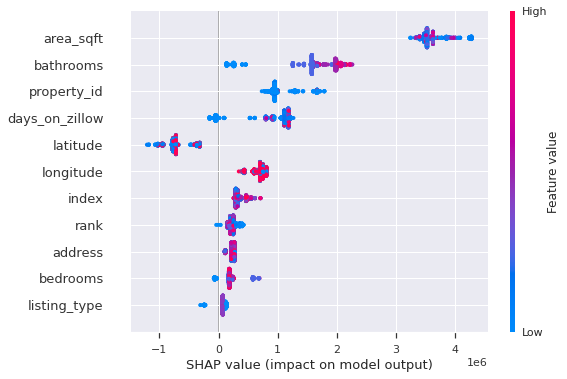

In [38]:
ranfrcls = RandomForestRegressor()
ranfrcls.fit(X_train,y_train)
explainer = shap.TreeExplainer(ranfrcls)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

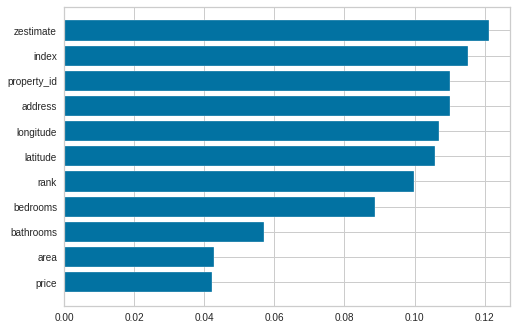

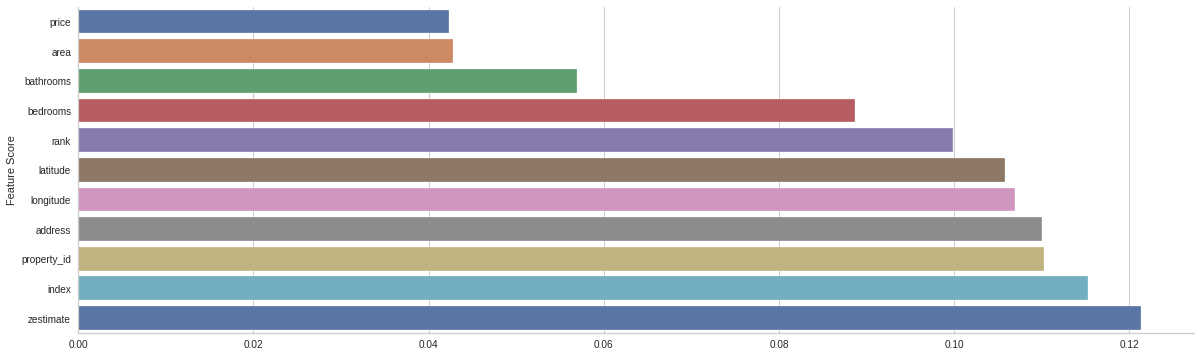

Feature: 0, Score: 6.00000
Feature: 1, Score: 9.00000
Feature: 2, Score: 7.00000
Feature: 3, Score: 8.00000
Feature: 4, Score: 1.00000
Feature: 5, Score: 4.00000
Feature: 6, Score: 5.00000
Feature: 7, Score: 3.00000
Feature: 8, Score: 2.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 10.00000


In [ ]:
dtrcl = DecisionTreeClassifier()
dtrcl.fit(X_sc, y)

importance = dtrcl.feature_importances_
sorted_feature_importance = dtrcl.feature_importances_.argsort()

# plot feature importance
plt.barh(df_feat.columns[sorted_feature_importance], 
        dtrcl.feature_importances_[sorted_feature_importance])
plt.show()
f = plt.subplots(figsize=(20, 6))
ax = sns.barplot(dtrcl.feature_importances_[sorted_feature_importance], df_feat.columns[sorted_feature_importance], palette="deep")
ax.set_ylabel("Feature Score")
# Finalize the plot
sns.despine(bottom=False)
plt.show()

# summarize feature importance
for i,v in enumerate(sorted_feature_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

## Outliers removal

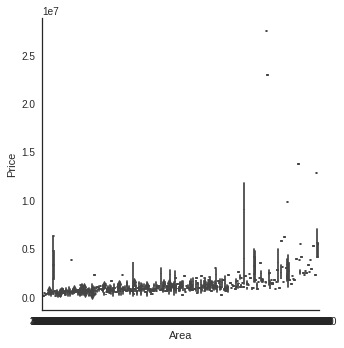

In [ ]:
with sns.axes_style(style='ticks'):
  g = sns.catplot('area_sqft', 'price', data=df_feat, kind="box")
  g.set_axis_labels("Area", "Price")

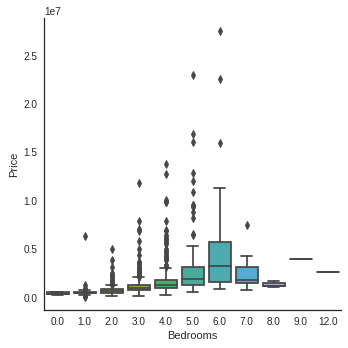

In [ ]:
with sns.axes_style(style='ticks'):
  g = sns.catplot('bedrooms', 'price', data=df_feat, kind="box")
  g.set_axis_labels("Bedrooms", "Price")

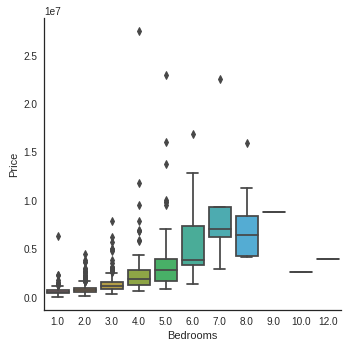

In [ ]:
with sns.axes_style(style='ticks'):
  g = sns.catplot('bathrooms', 'price', data=df_feat, kind="box")
  g.set_axis_labels("Bedrooms", "Price")

In [ ]:
# for outlier identification instead of 1 standart deviation I used 2 standart deviations
def remove_outliers(df, group_column, feature):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(group_column):
        m = np.mean(subdf[feature])
        st = np.std(subdf[feature])
        reduced_df = subdf[(subdf[feature]>(m-(2 * st))) & (subdf[feature]<=(m+(2 *st)))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_clean = remove_outliers(df_feat, 'area_sqft', 'price')
df_clean.shape

(695, 20)

In [ ]:
df_feat.shape

(1426, 20)

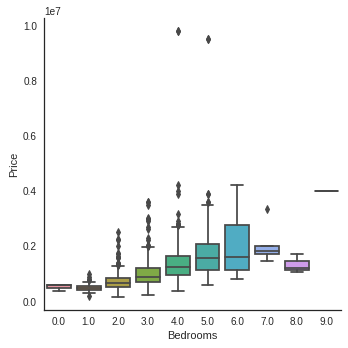

In [ ]:
with sns.axes_style(style='ticks'):
  g = sns.catplot('bedrooms', 'price', data=df_clean, kind="box")
  g.set_axis_labels("Bedrooms", "Price")

## Feature engineering

TBD: 
* remove index, rank, lat/long \
* add zipcode from the address? 

In [ ]:
def getZipCode(address):
  if not address:
    return None
  zipCode = address.split(' ').pop()
  return int(zipCode)
df_feat['zip_code'] =df_feat.address.apply(getZipCode)

In [ ]:
def get_zillow_data(row):
  page = requests.get(row['property_url'], headers=req_headers)
  if page.status_code != 200:
    return 0, 0, np.nan
  soup = BeautifulSoup(page.text, 'html.parser')
  #get lot area data
  lot_sibling_span = soup.find('span', text="Lot:")
  lot_span = lot_sibling_span.find_next_sibling('span') if lot_sibling_span else None
  lot_area = lot_span.getText() if lot_span else 0

  #get school rating
  elementary_school_span = soup.select_one('ul#ds-nearby-schools-list li div div span')
  elementary_school = elementary_school_span.getText() if elementary_school_span else np.nan
 
  return lot_area, elementary_school

In [ ]:
df_feat['hoa'], df_feat['lot_area'], df_feat['school'] = zip(*df_feat.apply(get_zillow_data, axis=1))


In [ ]:
df_feat.lot_area.unique()

In [ ]:
def parse_lot(row):
  if row.lot_area == 0 or row.lot_area == 'No Data':
    return 0, ""
  s = row.lot_area.split(' ');
  num = re.findall('[0-9]+', s[0])
  return int(''.join(num)), s[1]
df_feat.lot_area, df_feat['lot_unit'] = zip(*df_feat.apply(parse_lot, axis=1))

In [ ]:
df_feat.lot_unit.unique()

In [ ]:
def lot_multiplier(unit):
  if (unit == '' or unit == 'sqft'):
    return 1
  return 43560

df_feat['lot_multiplier'] = df_feat.lot_unit.apply(lot_multiplier)
df_feat.lot_area = df_feat.lot_area * df_feat.lot_multiplier

In [ ]:
# inspired by Kaggle EDA & Auto ML - House Prices 
def categorial_feature_overview(df, feature, rotation=0):
    print(feature.upper())
    f,ax = plt.subplots(1, 2, figsize=(20, 6))
    ax[0].tick_params(labelrotation=rotation)
    ax[1].tick_params(labelrotation=rotation)
    sns.boxplot(data=df, x=feature, y='price', ax=ax[1])
    sns.countplot(data=df, x=feature, ax=ax[0]);
    plt.show()
    
def numerical_feature_overview(df, feature, rotation=0):
    print(feature.upper())
    f,ax = plt.subplots(1, 2, figsize=(20, 6))
    ax[0].tick_params(labelrotation=rotation)
    ax[1].tick_params(labelrotation=rotation)
    sns.scatterplot(data=df, x=feature, y='price', ax=ax[0]);
    sns.boxplot(data=df, x=feature, ax=ax[1])
    plt.show()

LISTING_TYPE


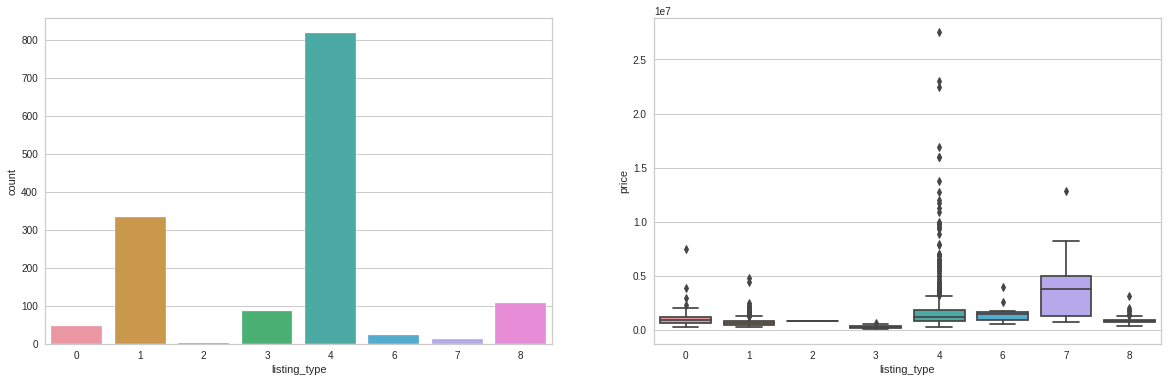

In [ ]:
categorial_feature_overview(df_feat, 'listing_type')

BEDROOMS


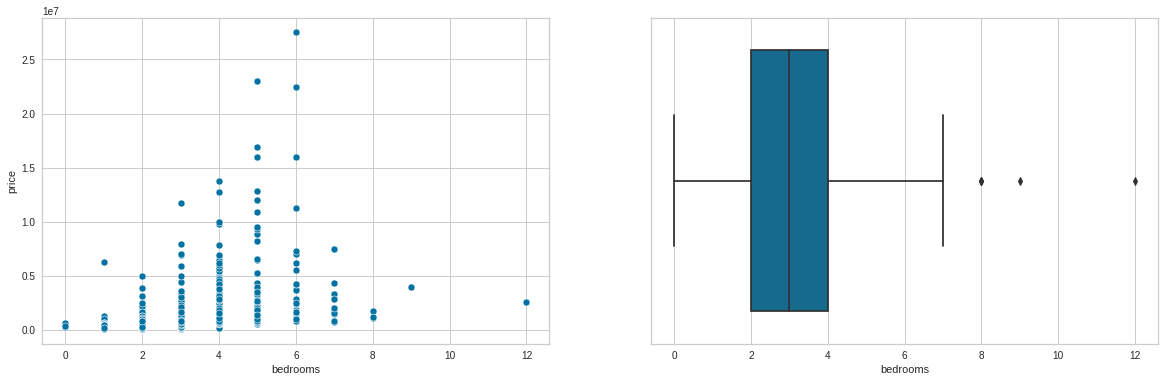

In [ ]:
numerical_feature_overview(df_feat, 'bedrooms')

BATHROOMS


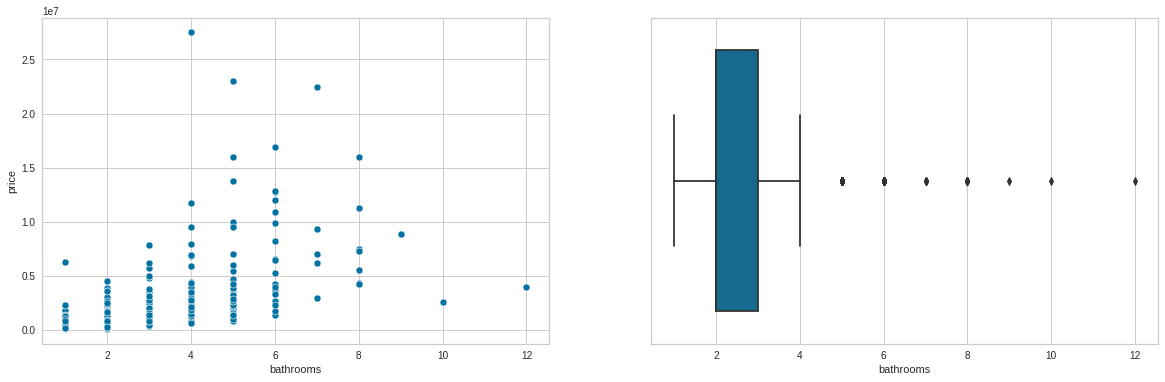

In [ ]:
numerical_feature_overview(df_feat, 'bathrooms')

AREA(SQFT)


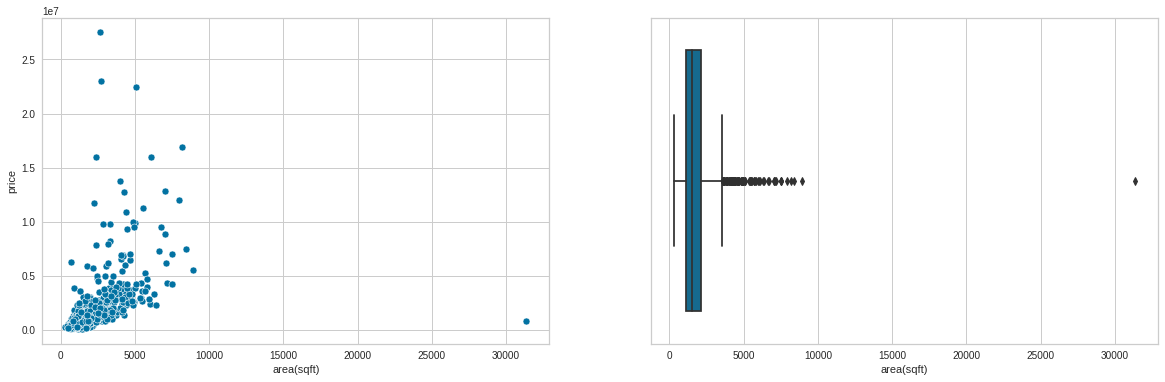

In [ ]:
numerical_feature_overview(df_feat, 'area_sqft')

# References